In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Get the current notebook's directory
notebook_dir = Path().absolute()

# Set the working directory to the notebook's directory
os.chdir(notebook_dir)

from constants import Cryptos, CCMIX
from crypto_attack import CryptoAttack
from local_projections import LocalProjections
from statistical_tests import TTest,GRANKTTest,GSignTest

In [2]:
CCMIX.load_data()
for crypto in Cryptos:
    crypto.value.load_data()
    crypto.value.add_market_returns(CCMIX.data)

Data for CCMIX loaded successfully.
Data for Bitcoin Gold loaded successfully.
Market returns added successfully to Bitcoin Gold data.
Data for Einsteinium loaded successfully.
Market returns added successfully to Einsteinium data.
Data for Electroneum loaded successfully.
Market returns added successfully to Electroneum data.
Data for Ethereum Classic loaded successfully.
Market returns added successfully to Ethereum Classic data.
Data for Expanse loaded successfully.
Market returns added successfully to Expanse data.
Data for Firo loaded successfully.
Market returns added successfully to Firo data.
Data for Horizen loaded successfully.
Market returns added successfully to Horizen data.
Data for Karbo loaded successfully.
Market returns added successfully to Karbo data.
Data for Litecoin loaded successfully.
Market returns added successfully to Litecoin data.
Data for MonaCoin loaded successfully.
Market returns added successfully to MonaCoin data.
Data for Public Index Network loaded

In [5]:
def testing_abnormal_returns(asset_returns, abnormal_returns):
    print("Statistical tests for significance")

    # T test
    t_test = TTest()
    assumptions_t = t_test.verify_assumptions(asset_returns)
    print("T-Test Assumptions:", assumptions_t)

    std_dev_t = abnormal_returns.std()
    t_stat_t = t_test.calculate_test(abnormal_returns.mean(), std_dev_t)  # Use mean of abnormal returns
    print("T-statistic (T-Test):", t_stat_t)

    # Generalized Rank Test
    grank_test = GRANKTTest()
    ranks = abnormal_returns.rank()  # Get ranks of abnormal returns
    assumptions_grank = grank_test.verify_assumptions(ranks)
    print("Generalized Rank Test Assumptions:", assumptions_grank)

    grank_stat = grank_test.calculate_test(ranks)
    print("Test statistic (Generalized Rank):", grank_stat)

    # Generalized Sign Test
    gsign_test = GSignTest()
    positive_abnormal_returns = (abnormal_returns > 0).astype(int)  # Binary conversion: 1 for positive, 0 for negative
    assumptions_gsign = gsign_test.verify_assumptions(positive_abnormal_returns)
    print("Generalized Sign Test Assumptions:", assumptions_gsign)

    w = positive_abnormal_returns.sum()  # Count of positive abnormal returns
    N = len(positive_abnormal_returns)
    p_hat = 0.5  # Hypothetical probability of positive returns
    gsign_stat = gsign_test.calculate_test(w, N, p_hat)
    print("Test statistic (Generalized Sign):", gsign_stat)

# Example usage:
# asset_returns = pd.Series([...])  # Your asset returns data
# abnormal_returns = pd.Series([...])  # Your abnormal returns data
# testing_abnormal_returns(asset_returns, abnormal_returns)


In [6]:
# Testing economic models
from models import MarketModel, MarketAdjustedModel, MeanAdjustedModel

horizon = 11
estimation_window_size = 80

for crypto in Cryptos:
  for attack_date in crypto.value.attack_dates:
    print(crypto.value.name)
    # Sample data
    asset_returns = crypto.value.data['log_returns']
    market_returns = crypto.value.data['market_log_returns']
    # peer_returns = np.array([0.008, 0.014, 0.012, -0.003, 0.027])

    # Market Model Example
    mm = MarketModel(asset_returns, market_returns, attack_date, estimation_window_size, horizon)
    print(mm.verify_assumptions())
    print("CAR (Market Model):", mm.calculate_CAR())
    testing_abnormal_returns(asset_returns, mm.abnormal_returns)
    # Market-Adjusted Model Example
    mam = MarketAdjustedModel(asset_returns, market_returns, attack_date, estimation_window_size, horizon)
    print(mam.verify_assumptions())
    print("CAR (Market-Adjusted Model):", mam.calculate_CAR())
    testing_abnormal_returns(asset_returns, mam.abnormal_returns)

    # # Mean Adjusted Model Example
    # mam = MeanAdjustedModel(asset_returns, peer_returns)
    # print(mam.verify_assumptions())
    # print("CAR (Mean Adjusted Model):", mam.calculate_CAR())

Bitcoin Gold
[{'name': 'Linearity between asset and market returns', 'verified': False, 'method': 'OLS regression to check significance of beta.'}, {'name': 'Homoscedasticity', 'verified': True, 'method': 'Breusch-Pagan test.'}, {'name': 'No autocorrelation of errors', 'verified': True, 'method': 'Durbin-Watson test.'}]
CAR (Market Model): -0.17864101879472283
Statistical tests for significance
T-Test Assumptions: [{'Assumption': 'Normality', 'Verification Method': 'Shapiro-Wilk Test', 'Verified': 'no'}, {'Assumption': 'Independence', 'Verification Method': 'Autocorrelation Check', 'Verified': 'yes'}]
T-statistic (T-Test): -0.2671794142587191
Generalized Rank Test Assumptions: [{'Assumption': 'No Missing Data', 'Verification Method': 'NaN Check', 'Verified': 'yes'}, {'Assumption': 'Independence', 'Verification Method': 'Autocorrelation Check', 'Verified': 'no'}]
Test statistic (Generalized Rank): -2.3489440745377745
Generalized Sign Test Assumptions: [{'Assumption': 'Binary Data', 'Ver

c:\Users\ASUS\Documents\stage d'application\Impact_of_forking_attacks\models.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not self.robust and model.pvalues[1] < 0.05:
c:\Users\ASUS\Documents\stage d'application\Impact_of_forking_attacks\models.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not self.robust and model.pvalues[1] < 0.05:
c:\Users\ASUS\Documents\stage d'application\Impact_of_forking_attacks\models.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To 

T-Test Assumptions: [{'Assumption': 'Normality', 'Verification Method': 'Shapiro-Wilk Test', 'Verified': 'no'}, {'Assumption': 'Independence', 'Verification Method': 'Autocorrelation Check', 'Verified': 'yes'}]
T-statistic (T-Test): -0.25402366403757815
Generalized Rank Test Assumptions: [{'Assumption': 'No Missing Data', 'Verification Method': 'NaN Check', 'Verified': 'yes'}, {'Assumption': 'Independence', 'Verification Method': 'Autocorrelation Check', 'Verified': 'no'}]
Test statistic (Generalized Rank): -2.3489440745377745
Generalized Sign Test Assumptions: [{'Assumption': 'Binary Data', 'Verification Method': 'Binary Check', 'Verified': 'yes'}, {'Assumption': 'Sufficient Sample Size', 'Verification Method': 'Sample Size Check', 'Verified': 'no'}]
Test statistic (Generalized Sign): -1.1547005383792517
[{'name': 'Asset returns move identically with the market', 'verified': False, 'method': 'Check correlation between asset and market returns.'}]
CAR (Market-Adjusted Model): -0.236002

c:\Users\ASUS\Documents\stage d'application\Impact_of_forking_attacks\models.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not self.robust and model.pvalues[1] < 0.05:
c:\Users\ASUS\Documents\stage d'application\Impact_of_forking_attacks\models.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not self.robust and model.pvalues[1] < 0.05:
c:\Users\ASUS\Documents\stage d'application\Impact_of_forking_attacks\models.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To 

In [4]:
# Statistical test
t_test = TTest()
assumptions = t_test.verify_assumptions(returns)
print(assumptions)

t_stat = t_test.calculate_test(abnormal_returns, std_dev)
print("T-statistic:", t_stat)

NameError: name 'returns' is not defined

In [ ]:
# Local projections
# Assuming 'df' is a DataFrame with your data, and you want to analyze the impact of an event

# Initialize the Local Projections model
lp_model = LocalProjections(data=df, outcome='log_returns', event_var='event_dummy', controls=['control_var1', 'control_var2'], event_time='event_time')

# Fit the model and estimate IRFs up to 10 horizons
irfs = lp_model.fit(max_horizon=10)

# Perform bootstrapping to get confidence intervals
ci_lower, ci_upper = lp_model.bootstrap_irfs(num_bootstraps=1000, max_horizon=10, seed=42)

# Plot the IRFs with confidence intervals
lp_model.plot_irfs(ci_lower=ci_lower, ci_upper=ci_upper)

# Print the summary of IRFs
lp_model.summary()


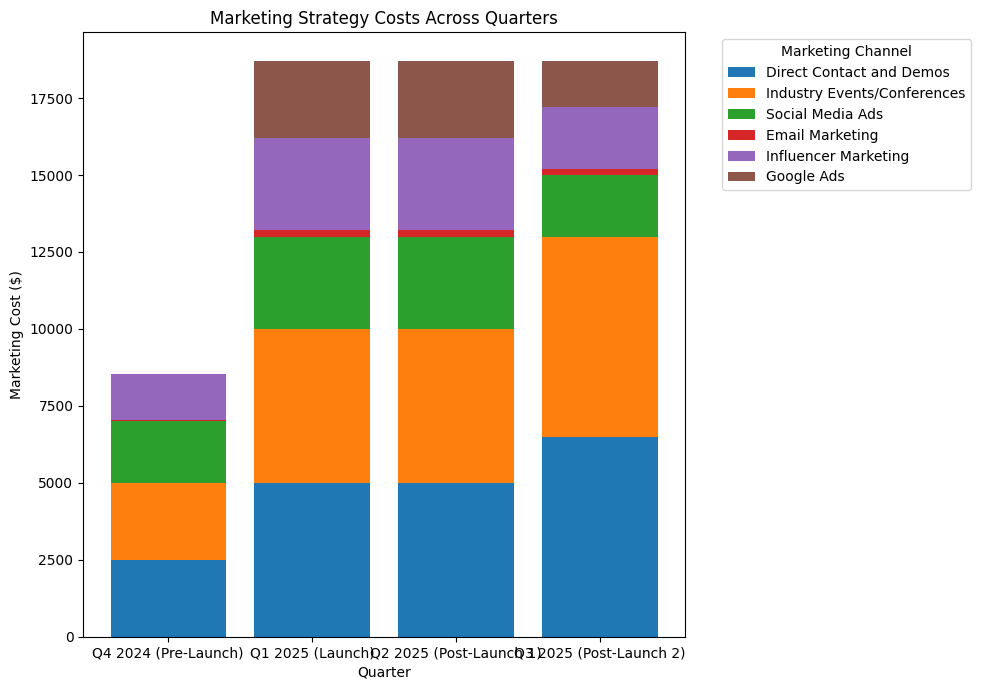

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the marketing strategy
quarters = ['Q4 2024 (Pre-Launch)', 'Q1 2025 (Launch)', 'Q2 2025 (Post-Launch 1)', 'Q3 2025 (Post-Launch 2)']

channels = ['Direct Contact and Demos', 'Industry Events/Conferences', 'Social Media Ads', 'Email Marketing', 
            'Influencer Marketing', 'Google Ads']

# Marketing costs for each channel in each quarter
costs = np.array([
    [2500, 2500, 2000, 50, 1500, 0],  # Pre-launch (Q4 2024)
    [5000, 5000, 3000, 200, 3000, 2500],  # Launch (Q1 2025)
    [5000, 5000, 3000, 200, 3000, 2500],  # Post-launch 1 (Q2 2025)
    [6500, 6500, 2000, 200, 2000, 1500],  # Post-launch 2 (Q3 2025)
])

# Creating a stacked histogram
fig, ax = plt.subplots(figsize=(10, 7))

bottom = np.zeros(len(quarters))

for i, channel in enumerate(channels):
    ax.bar(quarters, costs[:, i], label=channel, bottom=bottom)
    bottom += costs[:, i]

# Adding labels and title
ax.set_xlabel('Quarter')
ax.set_ylabel('Marketing Cost ($)')
ax.set_title('Marketing Strategy Costs Across Quarters')
ax.legend(title='Marketing Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


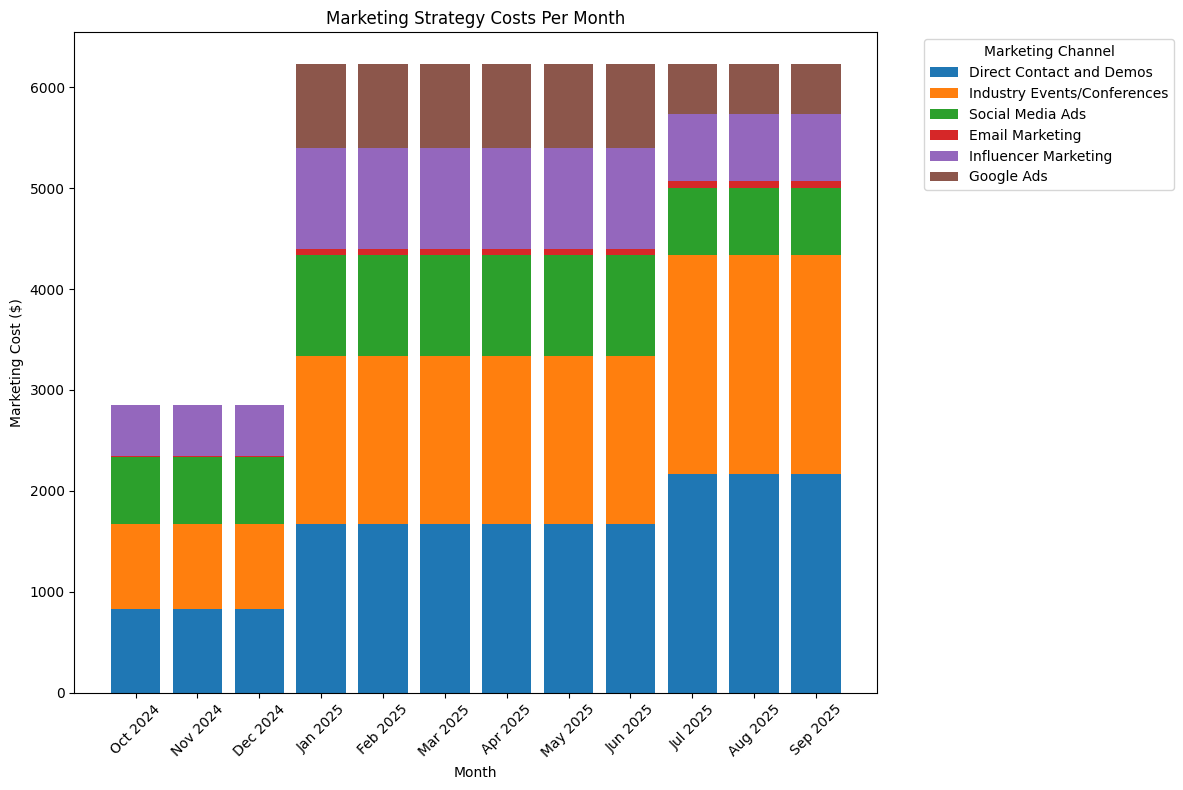

In [8]:
# Updated data for the marketing strategy (by month)
months = ['Oct 2024', 'Nov 2024', 'Dec 2024', 
          'Jan 2025', 'Feb 2025', 'Mar 2025', 
          'Apr 2025', 'May 2025', 'Jun 2025', 
          'Jul 2025', 'Aug 2025', 'Sep 2025']

# Monthly breakdown of costs for each marketing channel
monthly_costs = np.array([
    [833.33, 833.33, 666.67, 16.67, 500, 0],  # Oct 2024
    [833.33, 833.33, 666.67, 16.67, 500, 0],  # Nov 2024
    [833.33, 833.33, 666.67, 16.67, 500, 0],  # Dec 2024
    [1666.67, 1666.67, 1000, 66.67, 1000, 833.33],  # Jan 2025
    [1666.67, 1666.67, 1000, 66.67, 1000, 833.33],  # Feb 2025
    [1666.67, 1666.67, 1000, 66.67, 1000, 833.33],  # Mar 2025
    [1666.67, 1666.67, 1000, 66.67, 1000, 833.33],  # Apr 2025
    [1666.67, 1666.67, 1000, 66.67, 1000, 833.33],  # May 2025
    [1666.67, 1666.67, 1000, 66.67, 1000, 833.33],  # Jun 2025
    [2166.67, 2166.67, 666.67, 66.67, 666.67, 500],  # Jul 2025
    [2166.67, 2166.67, 666.67, 66.67, 666.67, 500],  # Aug 2025
    [2166.67, 2166.67, 666.67, 66.67, 666.67, 500],  # Sep 2025
])

# Creating a stacked histogram for the monthly breakdown
fig, ax = plt.subplots(figsize=(12, 8))

bottom = np.zeros(len(months))

for i, channel in enumerate(channels):
    ax.bar(months, monthly_costs[:, i], label=channel, bottom=bottom)
    bottom += monthly_costs[:, i]

# Adding labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Marketing Cost ($)')
ax.set_title('Marketing Strategy Costs Per Month')
ax.legend(title='Marketing Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
